# Function

In [1]:
f = lambda x: -2*x**5 - x**4 + 3*x**3 + np.sin(x)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_data = np.arange(-10, 10, 0.1)
y_data = np.array([f(i) for i in x_data])

Text(0, 0.5, 'f(x)')

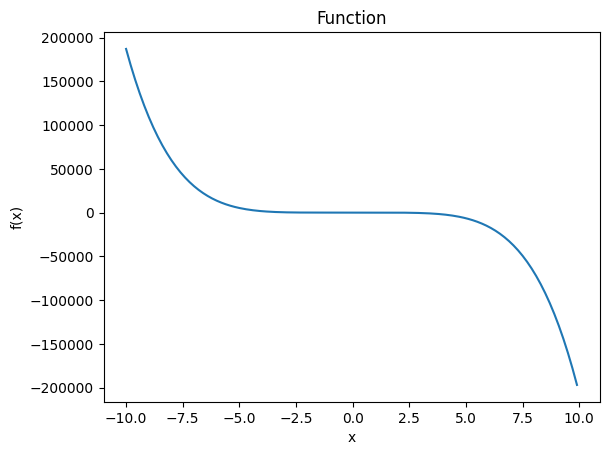

In [4]:
plt.plot(x_data, y_data)
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

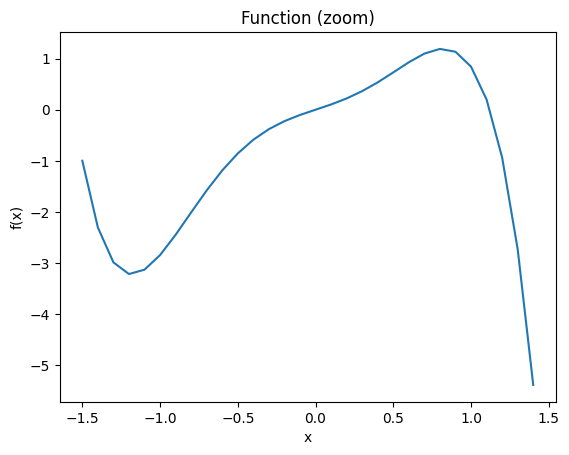

In [5]:
plt.plot(x_data[85:115], y_data[85:115])
plt.title('Function (zoom)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Solve with Keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [7]:
# create data for training from the function

x_train = np.array(x_data, dtype=np.float32)

y_train = np.array(y_data, dtype=np.float32)


# create data for testing from a function

x_val = np.array(np.arange(-10, 10, 0.092), dtype=np.float32)

y_val = np.array([f(i) for i in x_val], dtype=np.float32)

In [8]:
x_val.shape

(218,)

In [11]:
%%time

# define model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=1))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# regression is performed, then a Dense layer containing a single neuron with a linear activation function is used
model.add(Dense(1, activation="linear"))

# compile model: the model is initialized with the Adam optimizer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3, decay=1e-3 / 200))

# patience early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# fit the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                    epochs=10000000, batch_size=100, verbose=0, callbacks=[es])

# Calculate predictions
pred_train_set = model.predict(x_train)
pred_val_set = model.predict(x_val)

Epoch 10369: early stopping
7/7 [==============================] - 0s 518us/step
CPU times: user 1min 28s, sys: 19.6 s, total: 1min 48s
Wall time: 1min 25s


Text(0, 0.5, 'Validation loss')

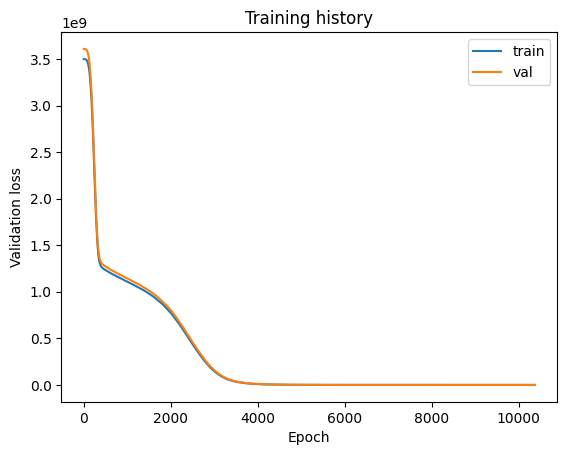

In [12]:
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Training history'),
plt.xlabel('Epoch'),
plt.ylabel('Validation loss')

Training Set R-Square= 0.9999997726481048


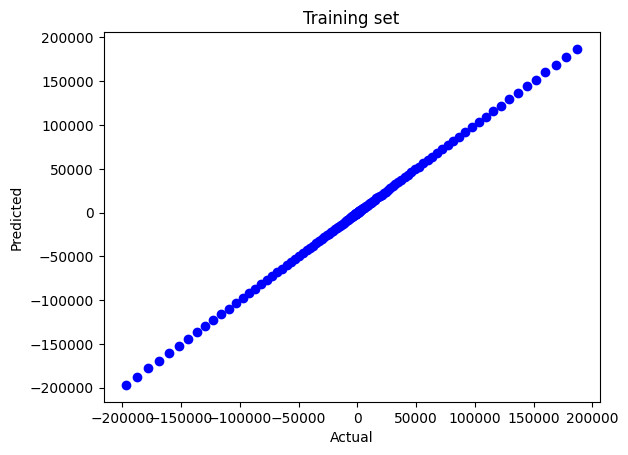

In [13]:
# plot actual vs prediction for training set

plt.plot(y_train, pred_train_set, 'bo')
plt.title('Training set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# compute R-Square value for training set

test_r2_value = r2_score(y_train, pred_train_set)
print("Training Set R-Square=", test_r2_value)

Text(0, 0.5, 'f(x)')

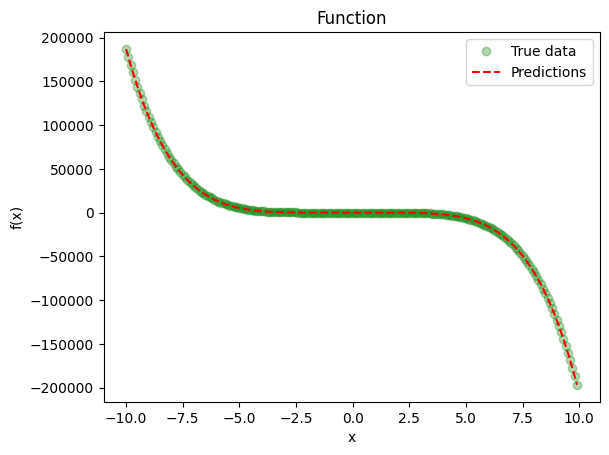

In [14]:
# plot both original function and predicted

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.3)
plt.plot(x_train, pred_train_set, 'r--', label='Predictions', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

13/13 [==============================] - 0s 369us/step


Text(0, 0.5, 'f(x)')

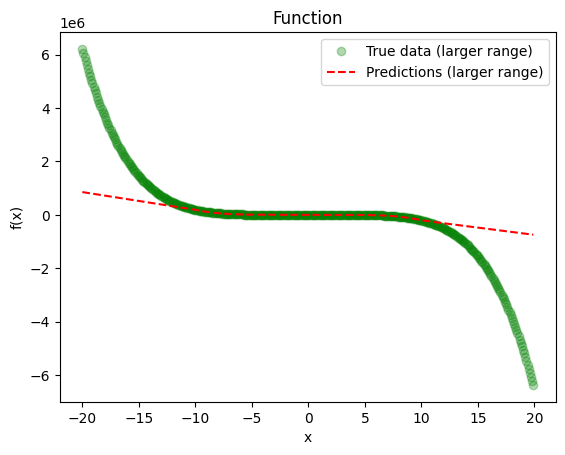

In [15]:
# check with more 'x' values

# get different section of points:
x_new_test = np.array(np.arange(-20, 20, 0.1), dtype=np.float32)
new_predicted = model.predict(x_new_test)

    
x_other = np.array(np.arange(-20, 20, 0.1), dtype=np.float32)
y_other = np.array([f(i) for i in x_other], dtype=np.float32)

plt.plot(x_other, y_other, 'go', label='True data (larger range)', alpha=0.3)
plt.plot(x_new_test, new_predicted, 'r--', label='Predictions (larger range)', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'Predicted')

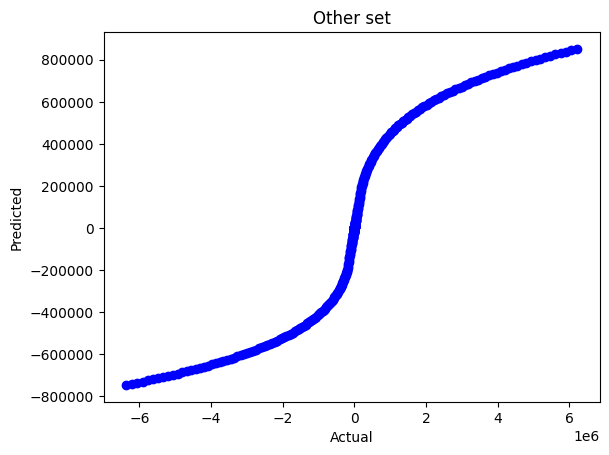

In [16]:
# plot actual vs prediction for new set

plt.plot(y_other, new_predicted, 'bo')
plt.title('Other set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Solve with PyTorch

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

In [18]:
# create data for training from a function

x_train_torch = torch.tensor(x_data, dtype=torch.float32).reshape(-1, 1)

y_train_torch = torch.tensor(y_data, dtype=torch.float32).reshape(-1, 1)

In [19]:
x_train_torch.shape

torch.Size([200, 1])

In [20]:
%%time

# define the model
model_torch = nn.Sequential(
    nn.Linear(1, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

# define loss function
loss_fn = torch.nn.MSELoss() 
# define optimizer
optimizer = optim.Adam(model_torch.parameters(), lr=0.0001)

epochs = 100000

# fit the model
for epoch in range(epochs):
    # clear gradient buffers (don't want to cummulate gradients)
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model_torch(x_train_torch)

    # get loss for the predicted output using the labels
    loss = loss_fn(outputs, y_train_torch)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss.item()))

CPU times: user 1min 20s, sys: 1min 53s, total: 3min 14s
Wall time: 1min 29s


Text(0, 0.5, 'Predicted')

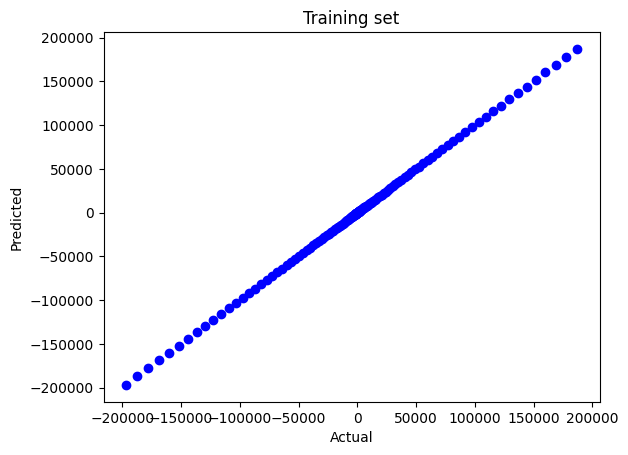

In [21]:
# plot actual vs prediction for training set

with torch.no_grad(): # we don't need gradients
    predicted = model_torch(x_train_torch)

plt.plot(y_train_torch, predicted, 'bo')
plt.title('Training set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'f(x)')

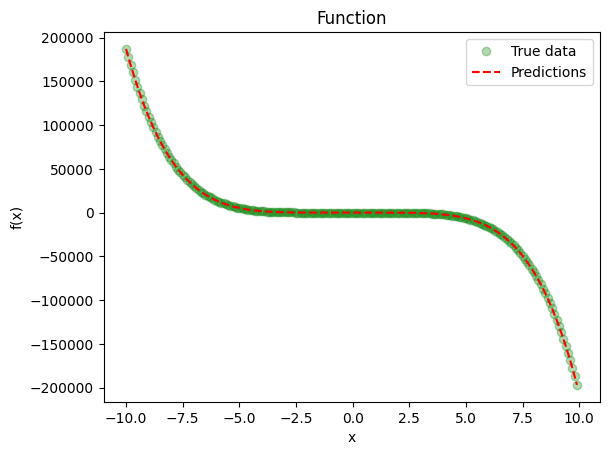

In [22]:
# plot both original function and predicted

plt.plot(x_train_torch, y_train_torch, 'go', label='True data', alpha=0.3)
plt.plot(x_train_torch, predicted, 'r--', label='Predictions', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

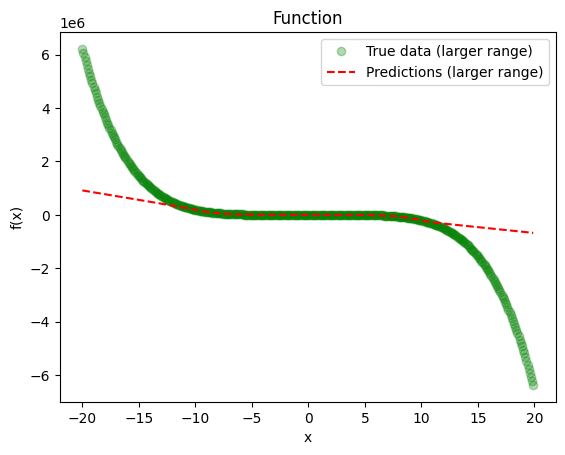

In [23]:
# check with more 'x' values

# get different section of points:
x_new_test_torch = torch.tensor(np.arange(-20, 20, 0.1), dtype=torch.float32).reshape(-1, 1)
with torch.no_grad(): # we don't need gradients
    new_predicted_torch = model_torch(x_new_test_torch)

    
x_other_torch = np.array(np.arange(-20, 20, 0.1), dtype=np.float32)
y_other_torch = np.array([f(i) for i in x_other], dtype=np.float32)

plt.plot(x_other_torch, y_other_torch, 'go', label='True data (larger range)', alpha=0.3)
plt.plot(x_new_test_torch, new_predicted_torch, 'r--', label='Predictions (larger range)', alpha=1)
plt.legend(loc='best')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'Predicted')

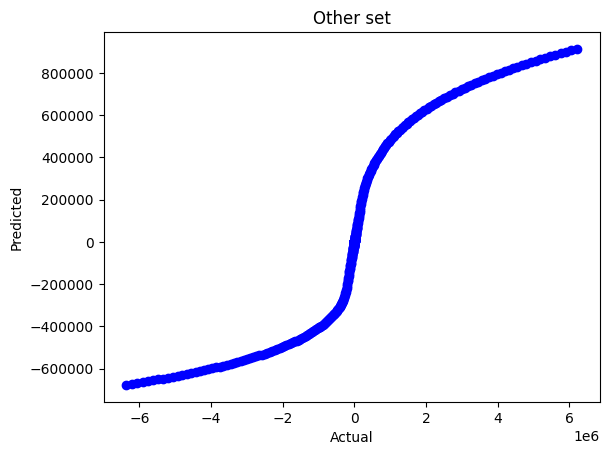

In [24]:
# plot actual vs prediction for new set

plt.plot(y_other_torch, new_predicted_torch, 'bo')
plt.title('Other set')
plt.xlabel('Actual')
plt.ylabel('Predicted')